In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [14]:

df = fetch_california_housing()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
X = dataset
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
elasticnet_regressor = ElasticNet()

In [18]:

parameters = {'alpha': [0.01, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [19]:
elasticnet_cv = GridSearchCV(elasticnet_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
elasticnet_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60,
                                   70, 80, 90],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [20]:
print(elasticnet_cv.best_params_)
print(elasticnet_cv.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.3}
-0.5282804010972133


In [21]:
y_pred = elasticnet_cv.predict(X_test)

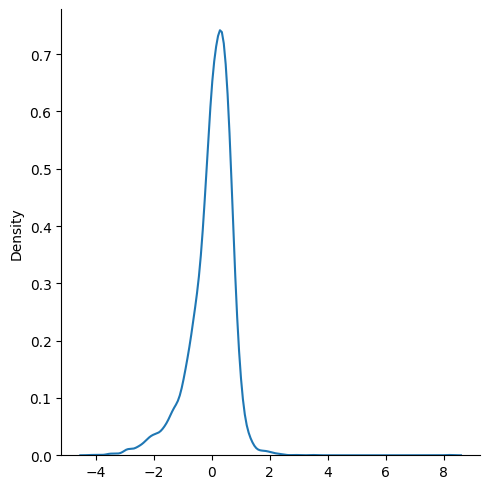

In [22]:
import seaborn as sns
sns.displot(y_pred - y_test, kind='kde')

In [23]:
score = r2_score(y_pred, y_test)
score

0.30328287064855186